In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# Function Definitions

In [2]:
def proj(v1, v2):
    """
    Returns the vector projection of v1 onto v2. v2 and v2 are numpy arrays.
    """
    if not (type(v1).__module__ == 'numpy' and type(v1).__module__ == 'numpy'):
        raise ValueError('Input a numpy array.')
    else:
        return (v1.dot(v2)/v2.dot(v2))*v2

def vectorize(v):
    """
    Puts vectors into a format for plotting.
    """
    zeros = np.zeros(len(v))
    return np.array([[a, b] for a, b in zip(zeros, v)])

def norm(v):
    """
    Normalizes the input vector.
    """
    if not (type(v).__module__ == 'numpy'):
        raise ValueError('Input a numpy array')
    else:
        return v/np.sqrt(v.dot(v))

def v_len(v):
    """
    Simple ass function for getting vector length.
    """
    if not (type(v).__module__ == 'numpy'):
        raise ValueError("Fuck.")
    else:
        return np.sqrt(v.dot(v))

# Problem 3

In [8]:
a = np.array([-4, -2, 3, 1.2, -5.5, 8.8, -1.9])

b = np.array([1, 1, 3, 1, -1, -3, 9])
c = np.array([1, -2, 3, 1, -1, 4, -3])

## Approach

Projection of a vector onto a multi-vector subspace is most easily achieved if the target vector subspace is spanned by orthonormal vectors. This can be achieved with the Gram-Schmidt Process. Then the projection on the subspace is the sum of the projection vectors onto each vector, given by the following:

$v_{\| U} = \sum_{i =1}^k \frac{\langle v, u_i\rangle}{\langle u_i, u_i \rangle} u_i = \frac{\langle v , u_1 \rangle}{\langle u_1 , u_1 \rangle} u_1 + \dots + \frac{\langle v , u_k \rangle}{\langle u_k , u_k \rangle} u_k.$

In [22]:
# Gram-Schmidt process.

# Arbitrarily picking b as the first orthogonal vector.
b_basis = norm(b)

# Subtracting projection of c onto b from c, normalizing.
c_proj_b = proj(c, b)
c_basis = norm(c - c_proj_b)

In [19]:
b_basis

array([ 0.09853293,  0.09853293,  0.29559878,  0.09853293, -0.09853293,
       -0.29559878,  0.88679635])

In [6]:
c_basis

array([ 0.21566555, -0.10783277,  0.64699664,  0.21566555, -0.21566555,
        0.10783277,  0.64699664])

In [21]:
v_len(c_basis)

0.99999999999999989

In [29]:
vec

array([[ 0.        ,  0.21566555],
       [ 0.        , -0.10783277],
       [ 0.        ,  0.64699664],
       [ 0.        ,  0.21566555],
       [ 0.        , -0.21566555],
       [ 0.        ,  0.10783277],
       [ 0.        ,  0.64699664]])

In [28]:
vec[0]

array([ 0.        ,  0.21566555])

In [23]:
np.dot(b_basis, c_basis)

0.78625583551418454

In [20]:
# Are the new bases actually orthogonal?

b_basis.dot(c_basis)

0.78625583551418454

In [7]:
# Are the new bases actually orthogonal?

b_basis.dot(c_basis)

0.78625583551418454

In [7]:
# Applying formula above, adding vector projections.

a_proj_bc = proj(a, b_basis) + proj(a, c_basis)

In [10]:
# Checking that if I subtract the projection of a onto b and onto c that I get a third basis vector that is orthogonal 
# to both b and c.

proj_ab = proj(a, b_basis)
proj_ac = proj(a, c_basis)

a_basis = a - proj_ab - proj_ac

print(a_basis.dot(b), a_basis.dot(c))

8.881784197e-15 -7.1054273576e-15


## Validating the functions

Just validating that the function definitions above do what they're supposed to do; i.e. get projections, normalize, etc...

In [11]:
# Making a couple random vectors, projecting v2 onto v1, and getting normalized vectors for all of the vectors. Vectorize 
# function formats vectors to look like a vector when used with plt.plot.

v1 = np.array([1, 3])
v1_norm = norm(v1)
v1_vec = vectorize(v1)
v1_norm_vec = vectorize(v1_norm)

v2 = np.array([4, 2])
v2_norm = norm(v2)
v2_vec = vectorize(v2)
v2_norm_vec = vectorize(v2_norm)

v1_v2 = proj(v1, v2)
v1_b = v1 - v1_v2
v1_b = norm(v1_b)
v1_b_vec = vectorize(v1_b)

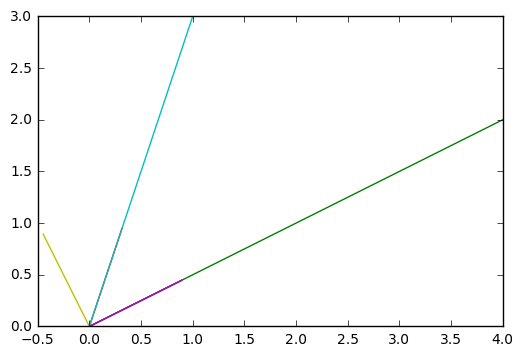

In [13]:
vectors = [v2_norm_vec, v2_vec, v1_norm_vec, v1_vec, v2_norm_vec, v1_b_vec]
for v in vectors:
    plt.plot(v[0], v[1])

# Problem 4

In [15]:
A = np.matrix([[-4, 1, 1], [-2, -2, 1], [3, 10, 4]])
A

matrix([[-4,  1,  1],
        [-2, -2,  1],
        [ 3, 10,  4]])

In [16]:
# Get eigenvalues and eigenvectors.
e_vals, e_vecs = la.eig(A)

In [17]:
e_vals

array([-4.61011022+0.j, -2.77786946+0.j,  5.38797968+0.j])

In [19]:
# linalg.eig outputs eigenvectors such that the column vectors are the eigenvectors, and each eigenvector i is 
# obtained with e_vecs[:,i].

e_vecs

array([[-0.34087679, -0.16764968,  0.11613141],
       [-0.552587  ,  0.58708526,  0.10228643],
       [ 0.76055941, -0.79197505,  0.98795292]])

Using the eigenvector formula to check that matrix A times the eigenvector matrix equals the same thing as the eigenvalue-eigenvector product.

In [23]:
e_vecs*e_vals

array([[ 1.57147955-0.j,  0.46570893-0.j,  0.62571370+0.j],
       [ 2.54748699-0.j, -1.63084620+0.j,  0.55111723+0.j],
       [-3.50626273+0.j,  2.20000331-0.j,  5.32307028+0.j]])

In [24]:
A*e_vecs

matrix([[ 1.57147955,  0.46570893,  0.6257137 ],
        [ 2.54748699, -1.6308462 ,  0.55111723],
        [-3.50626273,  2.20000331,  5.32307028]])